# The next simple Keras classifier #
Generate a Gaussian distribution of points in the (X,Y) plane, assign points with x>0 and y>0 to group 0, x>0 and y<0 to group 1, x<0 and y>0 to group 2 and x<0 and y<0 to group 3. Then generate a model which recapitulates the groupings.

In [1]:
import random
import math
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
from keras.layers import Dense, Activation

In [4]:
from keras.utils.vis_utils import plot_model

In [5]:
num_points=5000
num_fit = 5000
point_data = []
group_data = []
for i in range(num_points):
  mag = math.sqrt(-2*math.log(random.random()))
  phase = 2*math.pi*random.random()
  point_data.append([mag*math.cos(phase),mag*math.sin(phase)]);
  if math.cos(phase)>0:
    if math.sin(phase)>0:
      group_data.append([1,0,0,0])
    else:
      group_data.append([0,1,0,0])
  else:
    if math.sin(phase)>0:
      group_data.append([0,0,1,0])
    else:
      group_data.append([0,0,0,1])
groups = np.array(group_data)
points = np.array(point_data)

In [6]:
model = Sequential()
model.add(Dense(4,input_shape=(2,)))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='rmsprop',loss='mse')

model.fit(points[0:num_fit],groups[0:num_fit],epochs=50, batch_size=100,verbose=False)

group_pred = model.predict(points)


In [7]:
num_right = 0
num_wrong = 0
for i in range(num_points):
    if np.argmax(group_pred[i])==np.argmax(groups[i]):
        num_right = num_right + 1
    else:
        num_wrong = num_wrong + 1
        
print ('There are '+str(num_right)+' correctly classifield points and '+
       str(num_wrong)+' wrong.')


There are 4982 correctly classifield points and 18 wrong.


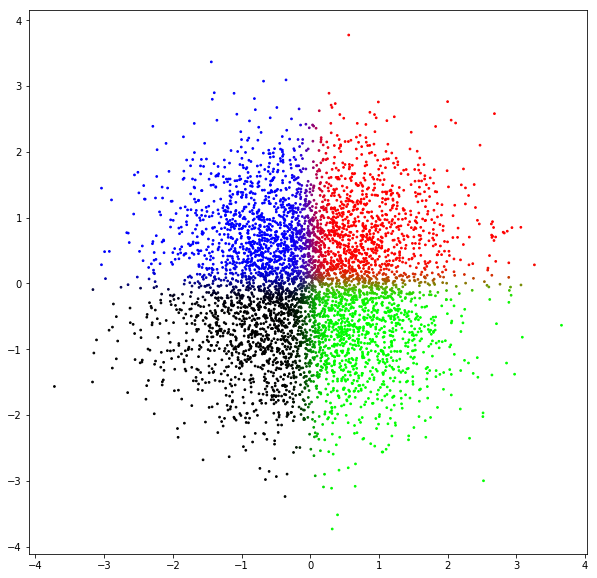

In [10]:
plt.rcParams['figure.figsize'] = [10,10]
plt.scatter(points[:,0],points[:,1],s=3,
            c=np.transpose(np.array([group_pred[:,0],group_pred[:,1],group_pred[:,2]])))

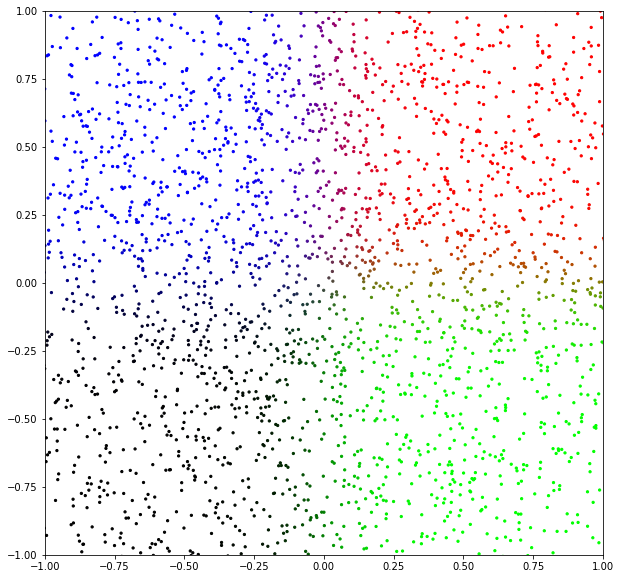

In [13]:
plt.scatter(points[:,0],points[:,1],s=5,
            c=np.transpose(np.array([group_pred[:,0],group_pred[:,1],group_pred[:,2]])))
plt.axis([-1,1,-1,1])
plt.show()